/tmp/ipython-input-2097943154.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_vitorias = sns.barplot(data=top_5_vitorias, x='Piloto', y='Vitorias', palette='Blues_r')


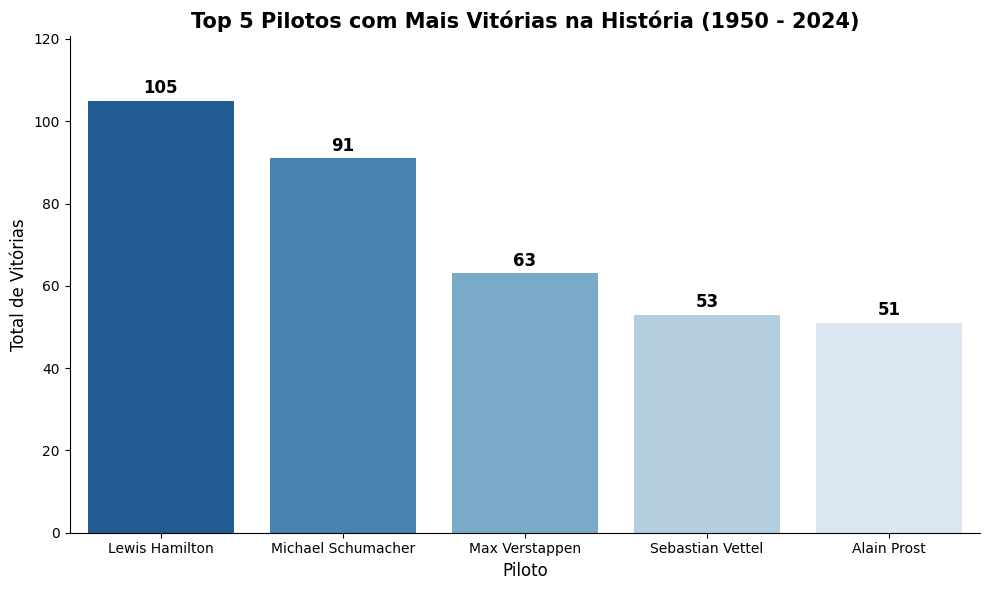

/tmp/ipython-input-2097943154.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_podios = sns.barplot(data=top_5_podios, x='Piloto', y='Podios', palette='Wistia_r')


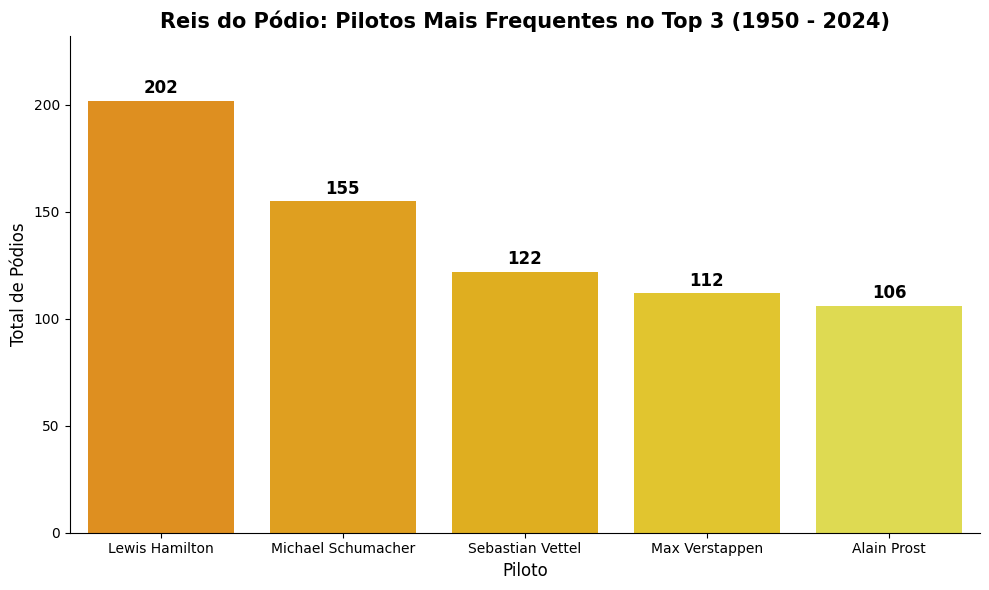

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. CARREGAMENTO E LIMPEZA DOS DADOS
# ==========================================
# Lemos os arquivos e usamos drop_duplicates() para ignorar qualquer arquivo que tenha vindo duplicado
results = pd.read_csv('/content/sample_data/results.csv').drop_duplicates()
drivers = pd.read_csv('/content/sample_data/drivers.csv').drop_duplicates()

# Juntando as tabelas para saber os nomes dos pilotos
df = results.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df['nome_piloto'] = df['forename'] + ' ' + df['surname']

# ==========================================
# 2. GRÁFICO 1: OS REIS DA VITÓRIA (1º LUGAR)
# ==========================================
# Filtra apenas quem chegou na 1ª posição (positionOrder == 1)
vitorias = df[df['positionOrder'] == 1]
top_5_vitorias = vitorias['nome_piloto'].value_counts().head(5).reset_index()
top_5_vitorias.columns = ['Piloto', 'Vitorias']

plt.figure(figsize=(10, 6))
grafico_vitorias = sns.barplot(data=top_5_vitorias, x='Piloto', y='Vitorias', palette='Blues_r')

# Adicionando os Data Labels (Números no topo de cada barra)
for p in grafico_vitorias.patches:
    grafico_vitorias.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center', xytext = (0, 9),
        textcoords = 'offset points', fontsize=12, fontweight='bold'
    )

plt.title('Top 5 Pilotos com Mais Vitórias na História (1950 - 2024)', fontsize=15, fontweight='bold')
plt.xlabel('Piloto', fontsize=12)
plt.ylabel('Total de Vitórias', fontsize=12)
plt.ylim(0, top_5_vitorias['Vitorias'].max() * 1.15) # Dá um respiro visual no topo do gráfico
sns.despine() # Remove as bordas feias do gráfico
plt.tight_layout()
plt.show()

# ==========================================
# 3. GRÁFICO 2: OS REIS DO PÓDIO (1º, 2º e 3º)
# ==========================================
# Filtra as posições 1, 2 e 3
podios = df[df['positionOrder'] <= 3]
top_5_podios = podios['nome_piloto'].value_counts().head(5).reset_index()
top_5_podios.columns = ['Piloto', 'Podios']

plt.figure(figsize=(10, 6))
# 'Wistia_r' é uma paleta com tons de amarelo/dourado (lembrando o troféu do pódio)
grafico_podios = sns.barplot(data=top_5_podios, x='Piloto', y='Podios', palette='Wistia_r')

for p in grafico_podios.patches:
    grafico_podios.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center', xytext = (0, 9),
        textcoords = 'offset points', fontsize=12, fontweight='bold'
    )

plt.title('Reis do Pódio: Pilotos Mais Frequentes no Top 3 (1950 - 2024)', fontsize=15, fontweight='bold')
plt.xlabel('Piloto', fontsize=12)
plt.ylabel('Total de Pódios', fontsize=12)
plt.ylim(0, top_5_podios['Podios'].max() * 1.15)
sns.despine()
plt.tight_layout()
plt.show()

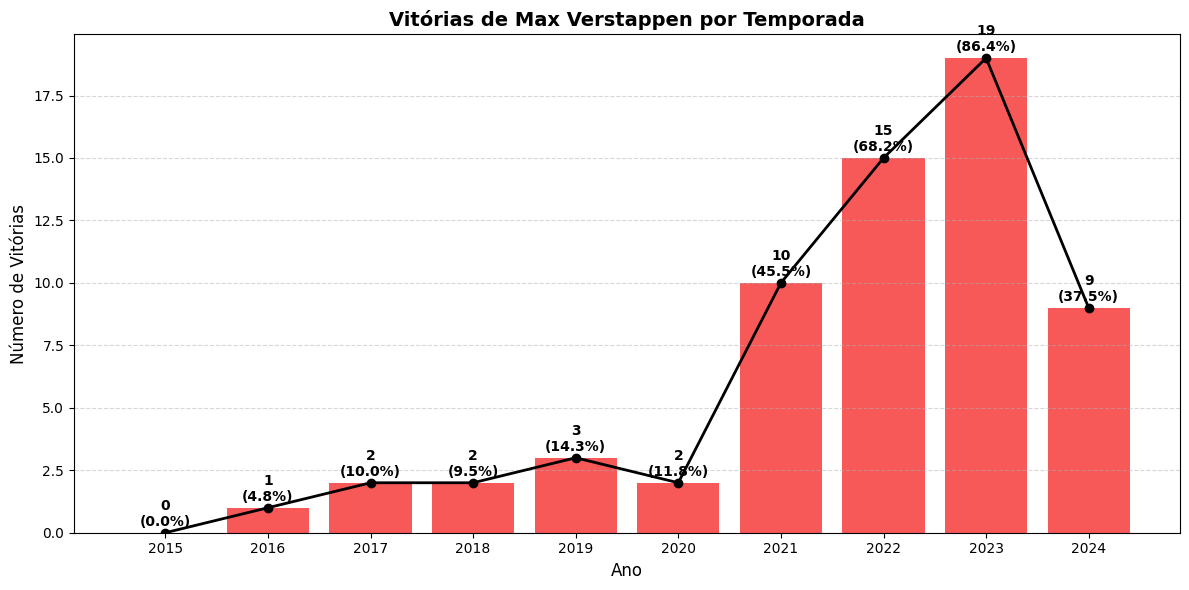

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados
drivers = pd.read_csv('/content/sample_data/drivers.csv')
results = pd.read_csv('/content/sample_data/results.csv')
races = pd.read_csv('/content/sample_data/races.csv')

# 2. Obter ID do Verstappen
driver_id = drivers[(drivers['forename'] == 'Max') & (drivers['surname'] == 'Verstappen')]['driverId'].values[0]

# 3. Processar dados
max_results = results[results['driverId'] == driver_id].copy()
max_results = max_results.merge(races[['raceId', 'year']], on='raceId')
max_results['win'] = (max_results['positionOrder'] == 1).astype(int)

# 4. Agrupar por ano
yearly_stats = max_results.groupby('year').agg(
    total_races=('raceId', 'count'),
    total_wins=('win', 'sum')
).reset_index()

# Calcular a taxa de vitória (média de vitórias por corrida)
yearly_stats['win_rate'] = (yearly_stats['total_wins'] / yearly_stats['total_races']) * 100

# 5. Criar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_stats['year'], yearly_stats['total_wins'], color='#F51111', alpha=0.7)
plt.plot(yearly_stats['year'], yearly_stats['total_wins'], marker='o', color='black', linewidth=2)

# Configurações visuais
plt.title('Vitórias de Max Verstappen por Temporada', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Vitórias', fontsize=12)
plt.xticks(yearly_stats['year'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar rótulos (Vitórias e Porcentagem/Média)
for i, row in yearly_stats.iterrows():
    plt.annotate(f"{int(row['total_wins'])}\n({row['win_rate']:.1f}%)",
                 (row['year'], row['total_wins']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

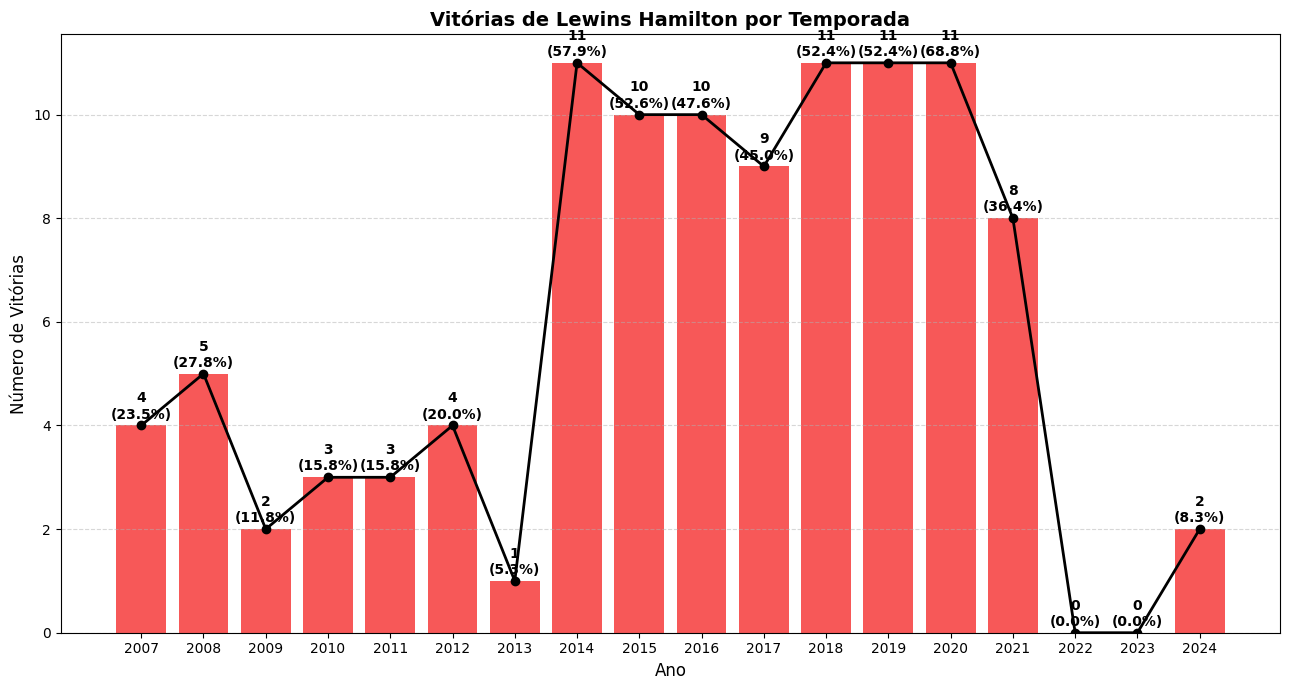

In [13]:

# 2. Obter ID do lewis
driver_id = drivers[(drivers['forename'] == 'Lewis') & (drivers['surname'] == 'Hamilton')]['driverId'].values[0]

# 3. Processar dados
max_results = results[results['driverId'] == driver_id].copy()
max_results = max_results.merge(races[['raceId', 'year']], on='raceId')
max_results['win'] = (max_results['positionOrder'] == 1).astype(int)

# 4. Agrupar por ano
yearly_stats = max_results.groupby('year').agg(
    total_races=('raceId', 'count'),
    total_wins=('win', 'sum')
).reset_index()

# Calcular a taxa de vitória (média de vitórias por corrida)
yearly_stats['win_rate'] = (yearly_stats['total_wins'] / yearly_stats['total_races']) * 100

# 5. Criar o gráfico
plt.figure(figsize=(13, 7))
bars = plt.bar(yearly_stats['year'], yearly_stats['total_wins'], color='#F51111', alpha=0.7)
plt.plot(yearly_stats['year'], yearly_stats['total_wins'], marker='o', color='black', linewidth=2)

# Configurações visuais
plt.title('Vitórias de Lewins Hamilton por Temporada', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Vitórias', fontsize=12)
plt.xticks(yearly_stats['year'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar rótulos (Vitórias e Porcentagem/Média)
for i, row in yearly_stats.iterrows():
    plt.annotate(f"{int(row['total_wins'])}\n({row['win_rate']:.1f}%)",
                 (row['year'], row['total_wins']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

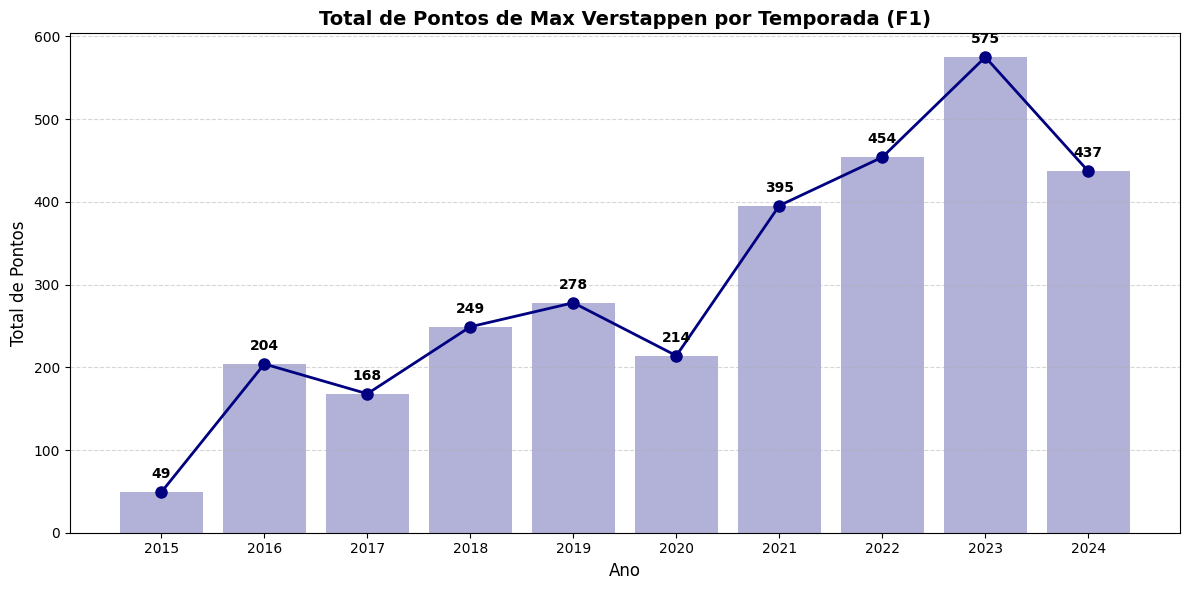

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados
sprint_results = pd.read_csv('/content/sample_data/sprint_results.csv')

# 2. Identificar driverId do Verstappen (830)
driver_id = 830

# 3. Somar pontos das corridas principais por ano
max_results = results[results['driverId'] == driver_id].merge(races[['raceId', 'year']], on='raceId')
race_points = max_results.groupby('year')['points'].sum().reset_index()

# 4. Somar pontos das corridas sprint por ano
max_sprints = sprint_results[sprint_results['driverId'] == driver_id].merge(races[['raceId', 'year']], on='raceId')
sprint_points = max_sprints.groupby('year')['points'].sum().reset_index()

# 5. Unificar os pontos totais
total_points = pd.merge(race_points, sprint_points, on='year', how='left').fillna(0)
total_points['total'] = total_points['points_x'] + total_points['points_y']

# 6. Gerar o gráfico
plt.figure(figsize=(12, 6))
plt.bar(total_points['year'], total_points['total'], color='navy', alpha=0.3)
plt.plot(total_points['year'], total_points['total'], marker='o', linestyle='-', color='navy', linewidth=2, markersize=8)

plt.title('Total de Pontos de Max Verstappen por Temporada (F1)', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Pontos', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(total_points['year'])

# Adicionar os valores numéricos
for i, row in total_points.iterrows():
    plt.annotate(f"{int(row['total'])}", (row['year'], row['total']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

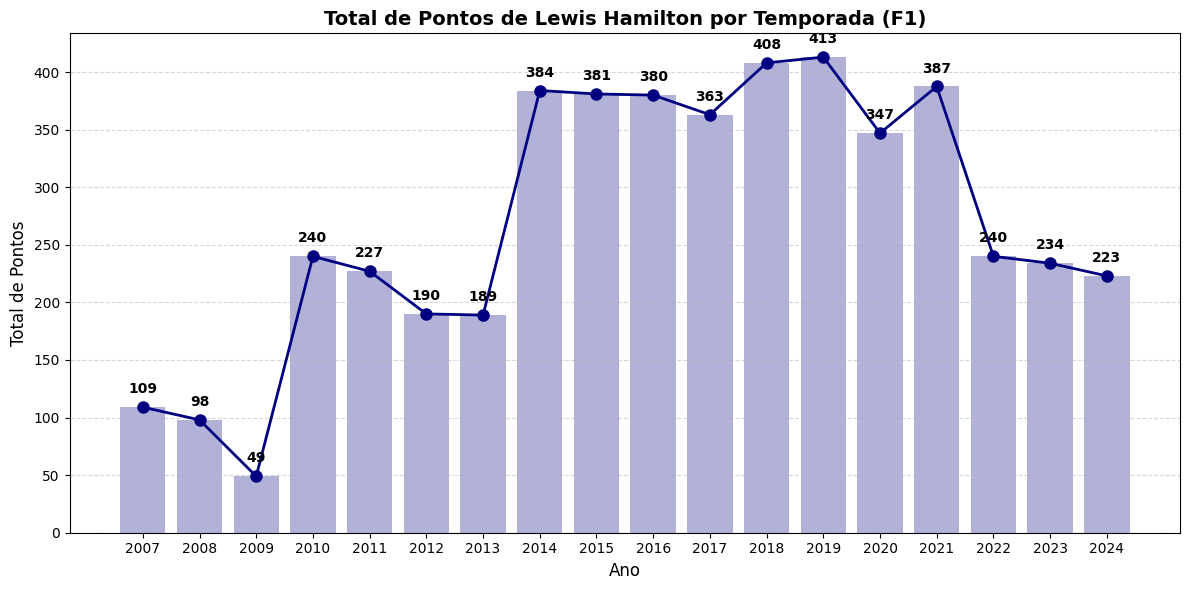

In [18]:
# 2. Identificar driverId do Verstappen (830)
driver_id = 1

# 3. Somar pontos das corridas principais por ano
max_results = results[results['driverId'] == driver_id].merge(races[['raceId', 'year']], on='raceId')
race_points = max_results.groupby('year')['points'].sum().reset_index()

# 4. Somar pontos das corridas sprint por ano
max_sprints = sprint_results[sprint_results['driverId'] == driver_id].merge(races[['raceId', 'year']], on='raceId')
sprint_points = max_sprints.groupby('year')['points'].sum().reset_index()

# 5. Unificar os pontos totais
total_points = pd.merge(race_points, sprint_points, on='year', how='left').fillna(0)
total_points['total'] = total_points['points_x'] + total_points['points_y']

# 6. Gerar o gráfico
plt.figure(figsize=(12, 6))
plt.bar(total_points['year'], total_points['total'], color='navy', alpha=0.3)
plt.plot(total_points['year'], total_points['total'], marker='o', linestyle='-', color='navy', linewidth=2, markersize=8)

plt.title('Total de Pontos de Lewis Hamilton por Temporada (F1)', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Pontos', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(total_points['year'])

# Adicionar os valores numéricos
for i, row in total_points.iterrows():
    plt.annotate(f"{int(row['total'])}", (row['year'], row['total']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

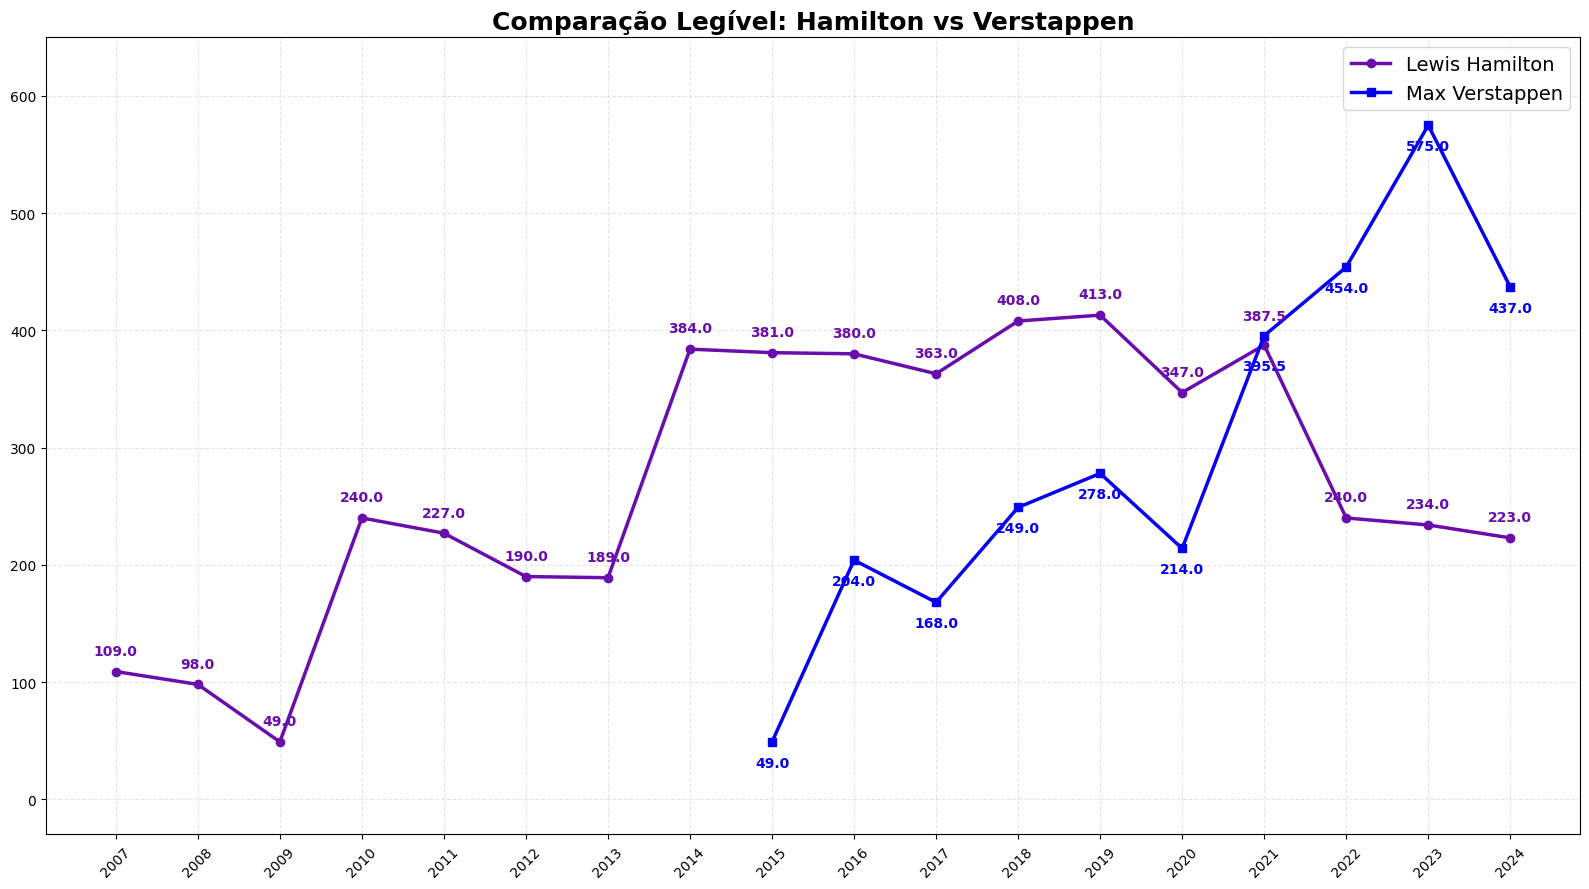

In [23]:
def get_total_points(driver_id):
    df_res = results[results['driverId'] == driver_id].merge(races[['raceId', 'year']], on='raceId')
    pts_race = df_res.groupby('year')['points'].sum().reset_index()
    df_spr = sprint_results[sprint_results['driverId'] == driver_id].merge(races[['raceId', 'year']], on='raceId')
    pts_spr = df_spr.groupby('year')['points'].sum().reset_index()
    total = pd.merge(pts_race, pts_spr, on='year', how='left').fillna(0)
    total['total'] = total['points_x'] + total['points_y']
    return total[['year', 'total']]

ham_pts = get_total_points(1)
max_pts = get_total_points(830)

# 2. Gerar Gráfico
plt.figure(figsize=(16, 9))

plt.plot(ham_pts['year'], ham_pts['total'], marker='o', color='#6A0DAD', label='Lewis Hamilton', linewidth=2.5)
plt.plot(max_pts['year'], max_pts['total'], marker='s', color='#0600EF', label='Max Verstappen', linewidth=2.5)

# 3. Adicionar Labels com lógica de afastamento
for i, row in ham_pts.iterrows():
    offset = 18 if row['year'] == 2021 else 12
    plt.annotate(f"{row['total']:.1f}", (row['year'], row['total']),
                 textcoords="offset points", xytext=(0, offset), ha='center',
                 fontsize=10, color='#6A0DAD', fontweight='bold')

for i, row in max_pts.iterrows():
    offset = -25 if row['year'] == 2021 else -18
    plt.annotate(f"{row['total']:.1f}", (row['year'], row['total']),
                 textcoords="offset points", xytext=(0, offset), ha='center',
                 fontsize=10, color='#0600EF', fontweight='bold')

plt.title('Comparação Legível: Hamilton vs Verstappen', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(sorted(list(set(ham_pts['year']) | set(max_pts['year']))), rotation=45)
plt.ylim(-30, 650) # Espaço extra no topo e base
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

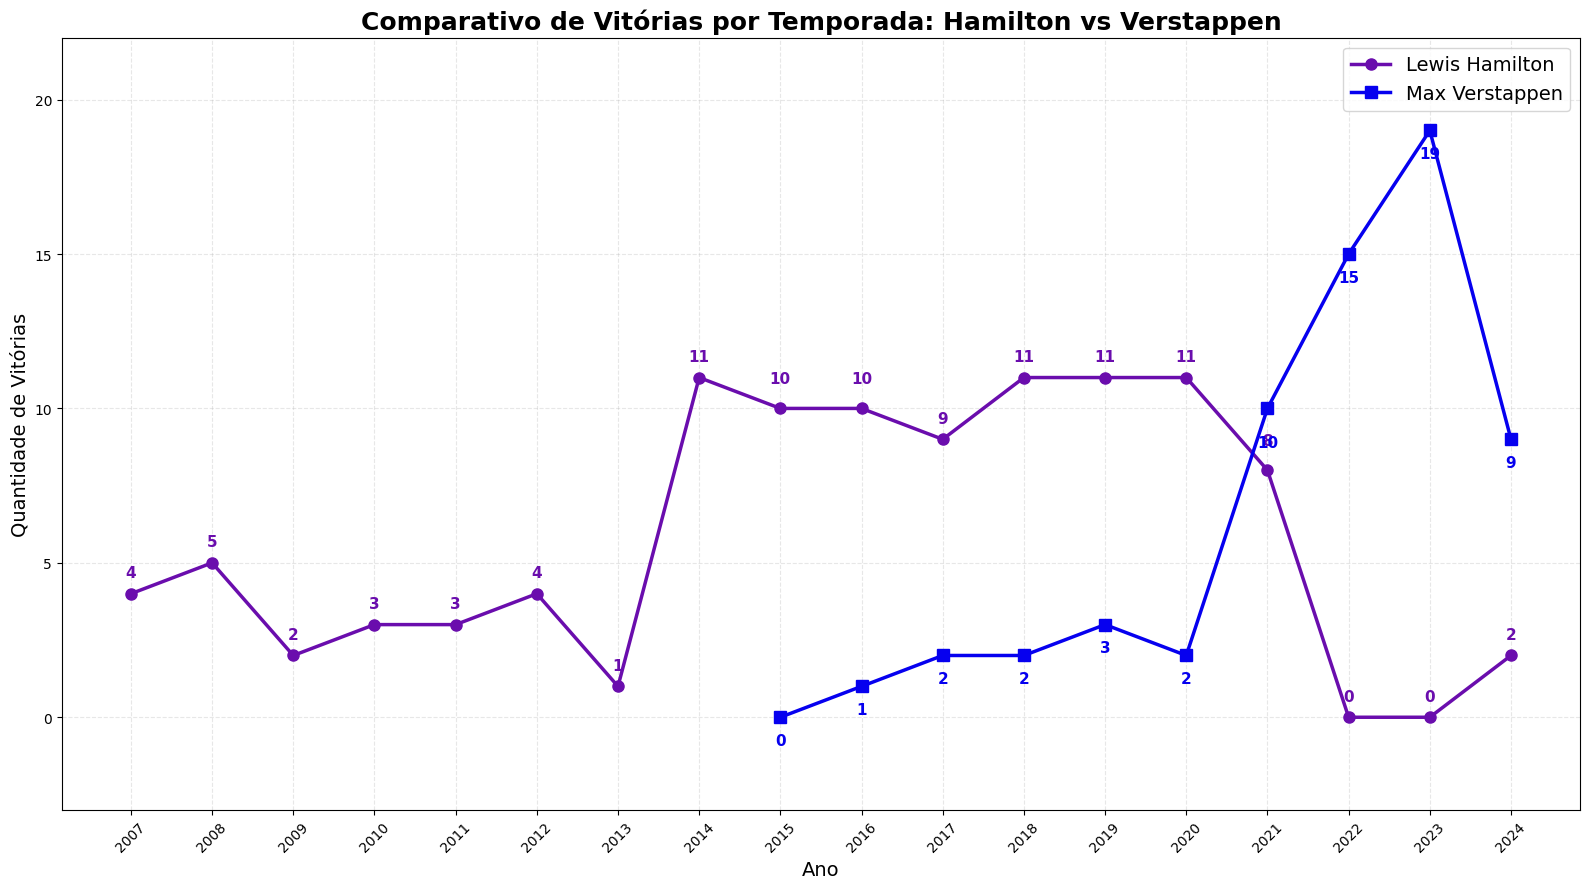

In [25]:
def get_yearly_wins(driver_id):
    df = results[results['driverId'] == driver_id].copy()
    df = df.merge(races[['raceId', 'year']], on='raceId')
    df['is_win'] = (df['positionOrder'] == 1).astype(int)
    return df.groupby('year')['is_win'].sum().reset_index()

# 2. Obter vitórias (Hamilton ID: 1 | Max ID: 830)
ham_wins = get_yearly_wins(1)
max_wins = get_yearly_wins(830)

# 3. Gerar o gráfico
plt.figure(figsize=(16, 9))

# Plotar as linhas
plt.plot(ham_wins['year'], ham_wins['is_win'], marker='o', color='#6A0DAD',
         label='Lewis Hamilton', linewidth=2.5, markersize=8)
plt.plot(max_wins['year'], max_wins['is_win'], marker='s', color='#0600EF',
         label='Max Verstappen', linewidth=2.5, markersize=8)

# 4. Adicionar rótulos numéricos (ajustados para evitar sobreposição)
for i, row in ham_wins.iterrows():
    offset = 18 if row['is_win'] in [10, 8] else 12 # Ajuste fino para 2021 e picos
    plt.annotate(f"{int(row['is_win'])}", (row['year'], row['is_win']),
                 textcoords="offset points", xytext=(0, offset), ha='center',
                 fontsize=11, color='#6A0DAD', fontweight='bold')

for i, row in max_wins.iterrows():
    offset = -28 if row['is_win'] == 10 else -20
    plt.annotate(f"{int(row['is_win'])}", (row['year'], row['is_win']),
                 textcoords="offset points", xytext=(0, offset), ha='center',
                 fontsize=11, color='#0600EF', fontweight='bold')

# Estilização final
plt.title('Comparativo de Vitórias por Temporada: Hamilton vs Verstappen', fontsize=18, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Vitórias', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(sorted(list(set(ham_wins['year']) | set(max_wins['year']))), rotation=45)
plt.ylim(-3, 22)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

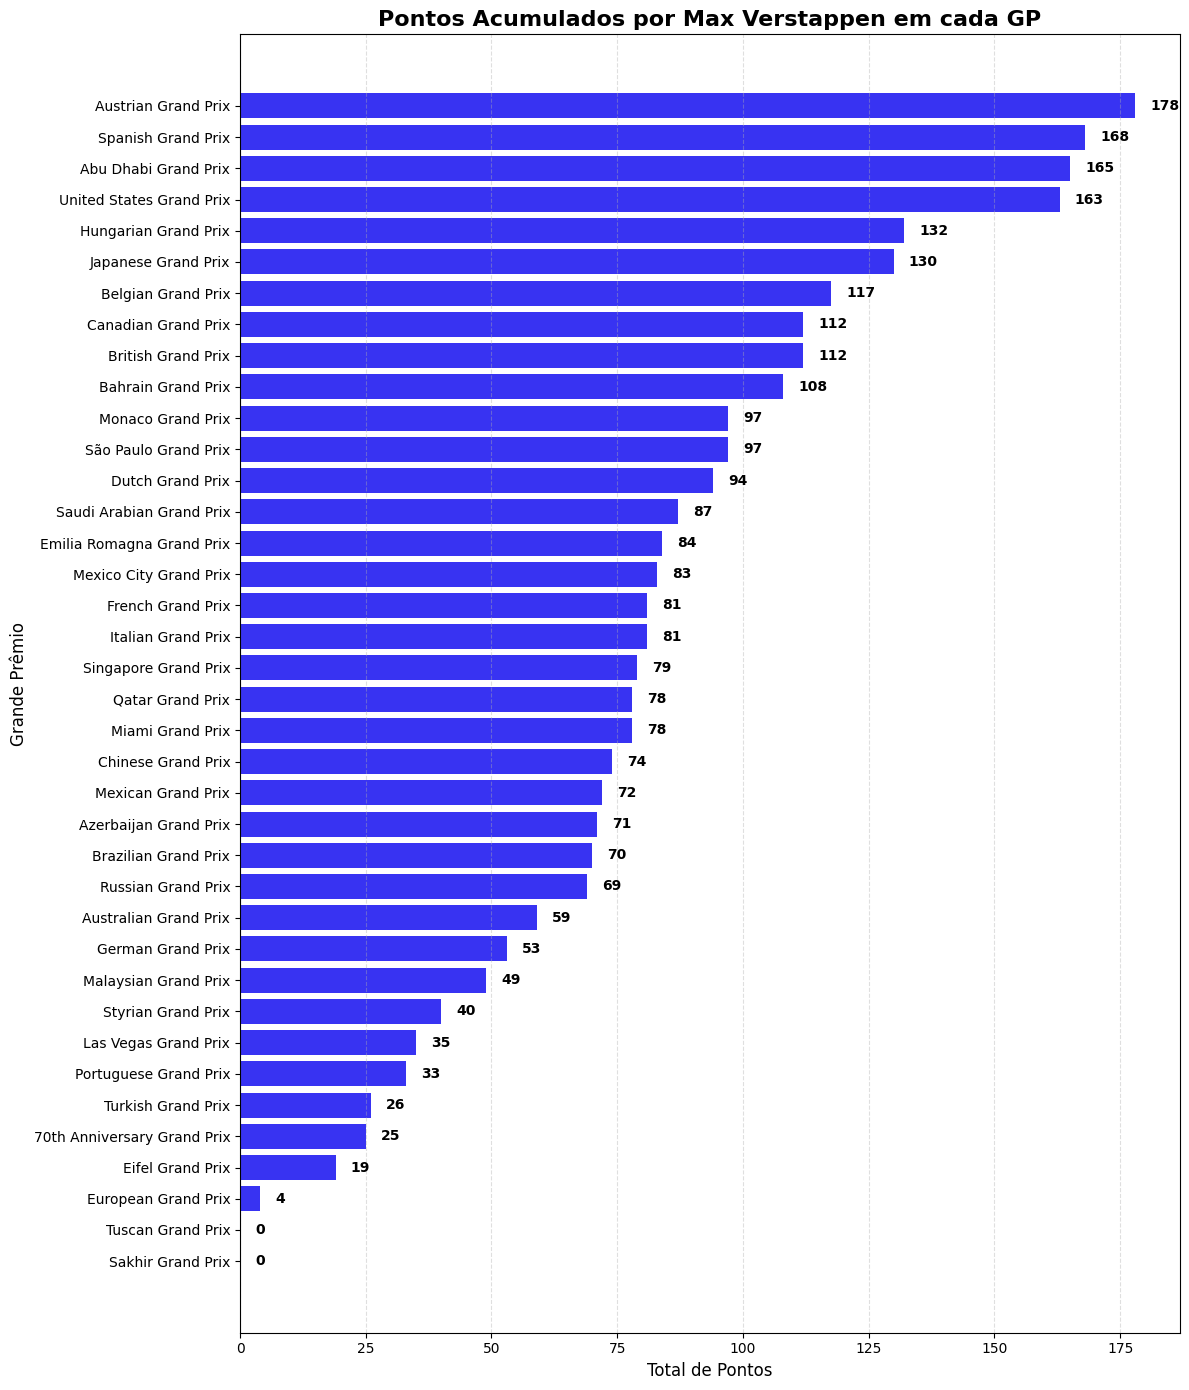

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Filtrar para Max Verstappen (ID 830)
max_id = 830

# Pontos das corridas principais
max_race_data = results[results['driverId'] == max_id].merge(races[['raceId', 'name']], on='raceId')
race_gp_points = max_race_data.groupby('name')['points'].sum().reset_index()

# Pontos das sprints
max_sprint_data = sprint_results[sprint_results['driverId'] == max_id].merge(races[['raceId', 'name']], on='raceId')
sprint_gp_points = max_sprint_data.groupby('name')['points'].sum().reset_index()

# 3. Consolidar pontos totais por nome de GP
gp_total = pd.merge(race_gp_points, sprint_gp_points, on='name', how='outer').fillna(0)
gp_total['total'] = gp_total['points_x'] + gp_total['points_y']
gp_total = gp_total.sort_values('total', ascending=True) # Ordenar para o gráfico lateral

# 4. Criar gráfico de barras horizontais
plt.figure(figsize=(12, 14))
plt.barh(gp_total['name'], gp_total['total'], color='#0600EF', alpha=0.8)

# Adicionar os valores nas pontas das barras
for index, value in enumerate(gp_total['total']):
    plt.text(value + 3, index, f'{int(value)}', va='center', fontweight='bold')

plt.title('Pontos Acumulados por Max Verstappen em cada GP', fontsize=16, fontweight='bold')
plt.xlabel('Total de Pontos', fontsize=12)
plt.ylabel('Grande Prêmio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

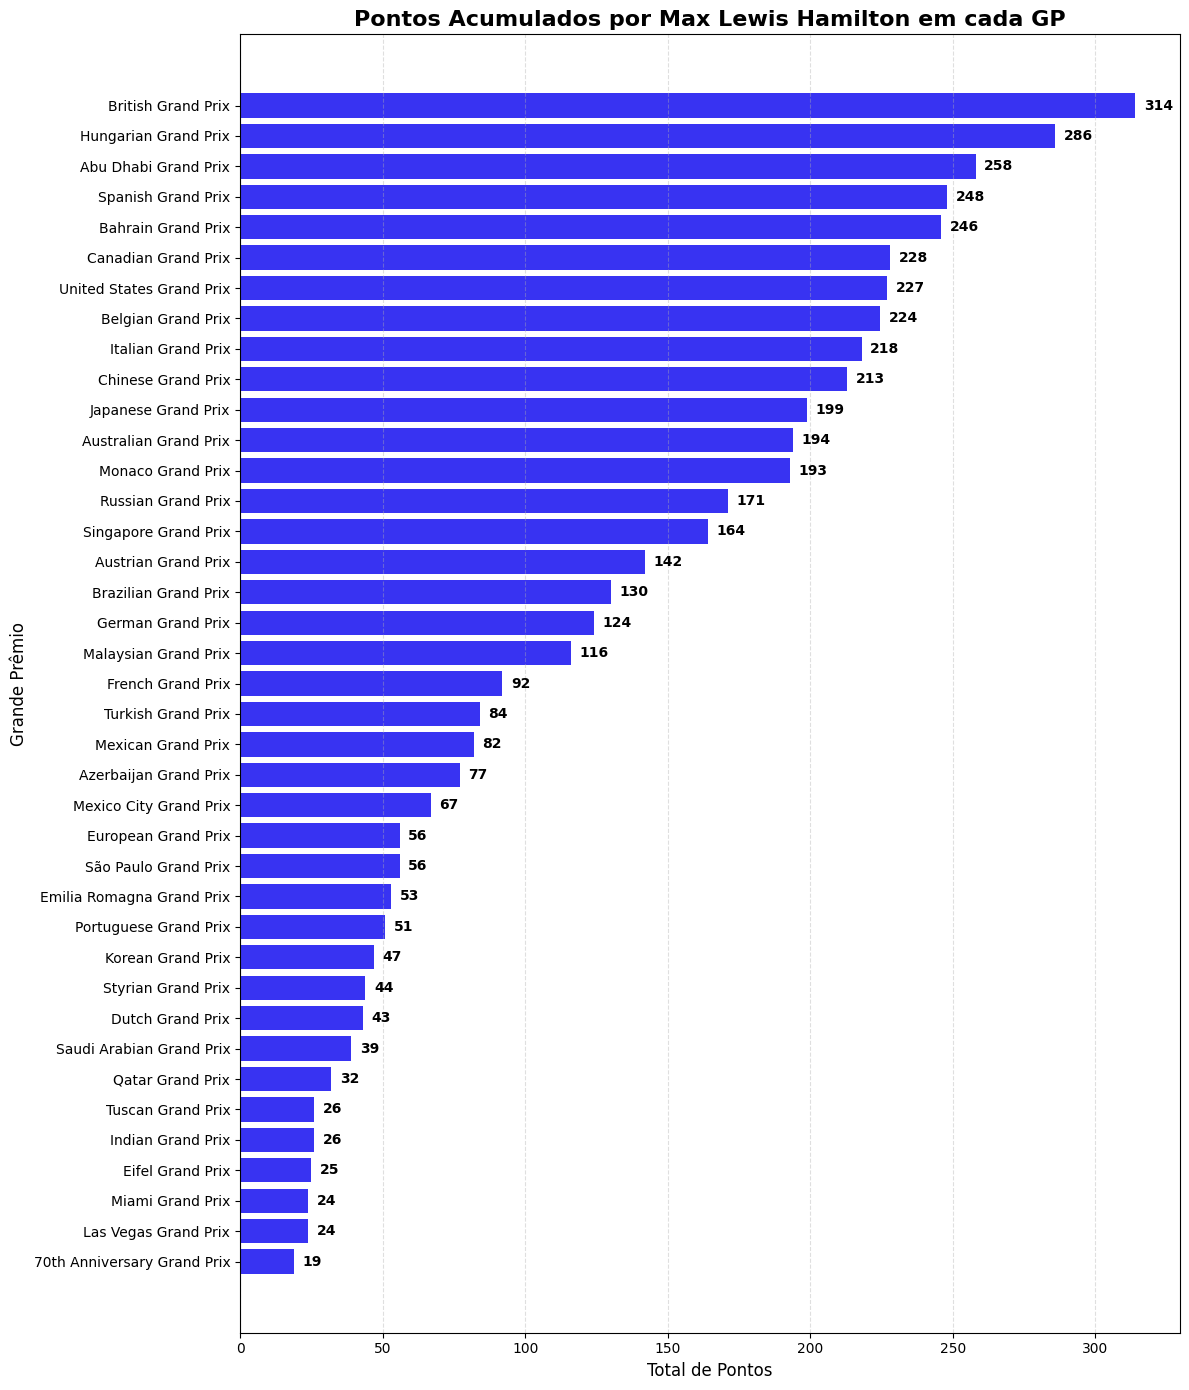

In [31]:
# 2. Filtrar para Max Verstappen (ID 830)
lewis_id = 1

# Pontos das corridas principais
lewis_race_data = results[results['driverId'] == max_id].merge(races[['raceId', 'name']], on='raceId')
race_gp_points = lewis_race_data.groupby('name')['points'].sum().reset_index()

# Pontos das sprints
lewis_sprint_data = sprint_results[sprint_results['driverId'] == max_id].merge(races[['raceId', 'name']], on='raceId')
sprint_gp_points = lewis_sprint_data.groupby('name')['points'].sum().reset_index()

# 3. Consolidar pontos totais por nome de GP
gp_total = pd.merge(race_gp_points, sprint_gp_points, on='name', how='outer').fillna(0)
gp_total['total'] = gp_total['points_x'] + gp_total['points_y']
gp_total = gp_total.sort_values('total', ascending=True) # Ordenar para o gráfico lateral

# 4. Criar gráfico de barras horizontais
plt.figure(figsize=(12, 14))
plt.barh(gp_total['name'], gp_total['total'], color='#0600EF', alpha=0.8)

# Adicionar os valores nas pontas das barras
for index, value in enumerate(gp_total['total']):
    plt.text(value + 3, index, f'{int(value)}', va='center', fontweight='bold')

plt.title('Pontos Acumulados por Lewis Hamilton em cada GP', fontsize=16, fontweight='bold')
plt.xlabel('Total de Pontos', fontsize=12)
plt.ylabel('Grande Prêmio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

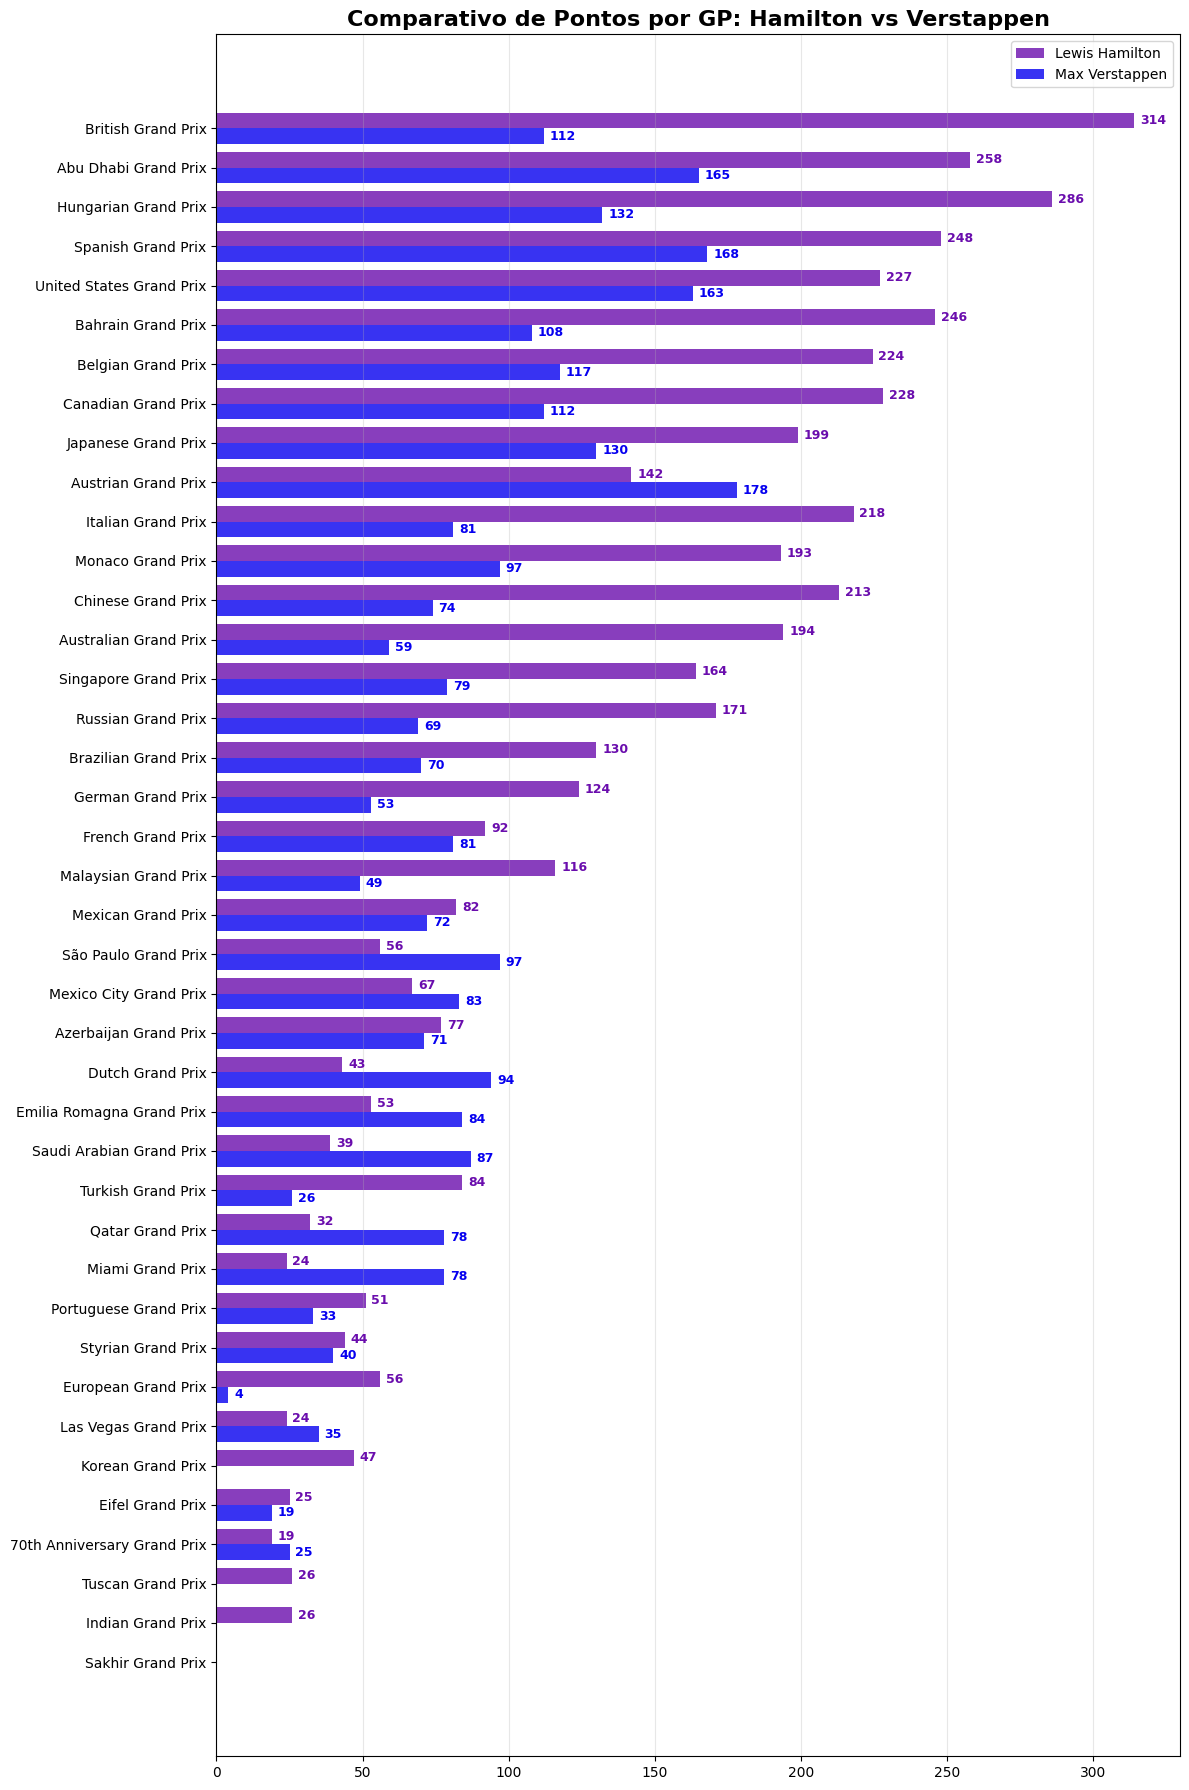

In [34]:
# Função para somar pontos por pista (Corrigido para driverId)
def get_points_by_track(driver_id):
    res = results[results['driverId'] == driver_id].merge(races[['raceId', 'name']], on='raceId')
    race_pts = res.groupby('name')['points'].sum().reset_index()

    spr = sprint_results[sprint_results['driverId'] == driver_id].merge(races[['raceId', 'name']], on='raceId')
    sprint_pts = spr.groupby('name')['points'].sum().reset_index()

    total = pd.merge(race_pts, sprint_pts, on='name', how='outer').fillna(0)
    total['total'] = total['points_x'] + total['points_y']
    return total[['name', 'total']]

# 2. Obter dados (Hamilton: 1, Max: 830)
ham_data = get_points_by_track(1)
max_data = get_points_by_track(830)

# 3. Cruzar e ordenar
comp = pd.merge(ham_data, max_data, on='name', how='outer', suffixes=('_ham', '_max')).fillna(0)
comp['soma'] = comp['total_ham'] + comp['total_max']
comp = comp.sort_values('soma', ascending=True)

# 4. Criar o Gráfico Lateral
plt.figure(figsize=(12, 18))
y = np.arange(len(comp))
largura = 0.4

plt.barh(y + largura/2, comp['total_ham'], largura, label='Lewis Hamilton', color='#6A0DAD', alpha=0.8)
plt.barh(y - largura/2, comp['total_max'], largura, label='Max Verstappen', color='#0600EF', alpha=0.8)

# Adicionar números nas barras
for i, row in comp.iterrows():
    idx = comp.index.get_loc(i)
    if row['total_ham'] > 0:
        plt.text(row['total_ham']+2, idx+largura/2, f"{int(row['total_ham'])}", va='center', color='#6A0DAD', fontweight='bold', fontsize=9)
    if row['total_max'] > 0:
        plt.text(row['total_max']+2, idx-largura/2, f"{int(row['total_max'])}", va='center', color='#0600EF', fontweight='bold', fontsize=9)

plt.yticks(y, comp['name'])
plt.title('Comparativo de Pontos por GP: Hamilton vs Verstappen', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

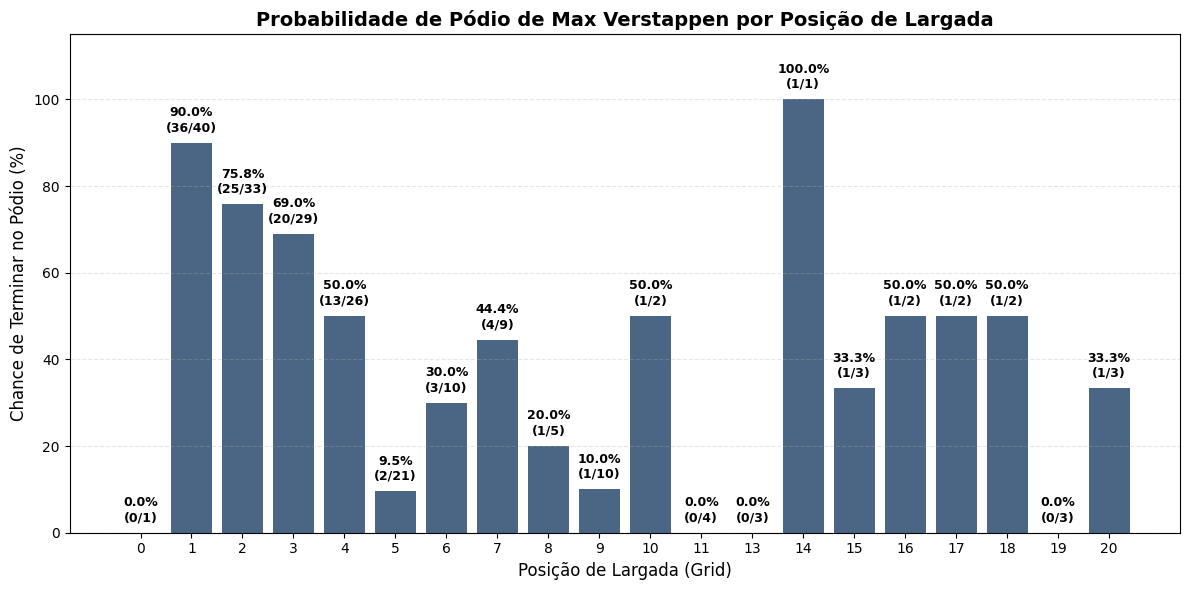

In [35]:
# 2. Max Verstappen ID (830)
max_id = 830

# 3. Filtrar resultados do Max e definir pódio (posições 1, 2 ou 3)
max_results = results[results['driverId'] == max_id].copy()
max_results['is_podium'] = (max_results['positionOrder'] <= 3).astype(int)

# 4. Calcular estatísticas por posição de largada (grid)
grid_stats = max_results.groupby('grid').agg(
    total_largadas=('raceId', 'count'),
    total_podios=('is_podium', 'sum')
).reset_index()

# 5. Calcular a probabilidade (porcentagem)
grid_stats['chance_podio'] = (grid_stats['total_podios'] / grid_stats['total_largadas']) * 100
grid_stats = grid_stats.sort_values('grid')

# 6. Criar o Gráfico de Barras
plt.figure(figsize=(12, 6))
bars = plt.bar(grid_stats['grid'].astype(str), grid_stats['chance_podio'], color='#1E3F66', alpha=0.8)

# Adicionar rótulos de texto com % e frequência (Pódios / Total)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    total = grid_stats.iloc[i]['total_largadas']
    podios = grid_stats.iloc[i]['total_podios']
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2,
             f"{yval:.1f}%\n({int(podios)}/{int(total)})",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Probabilidade de Pódio de Max Verstappen por Posição de Largada', fontsize=14, fontweight='bold')
plt.xlabel('Posição de Largada (Grid)', fontsize=12)
plt.ylabel('Chance de Terminar no Pódio (%)', fontsize=12)
plt.ylim(0, 115)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

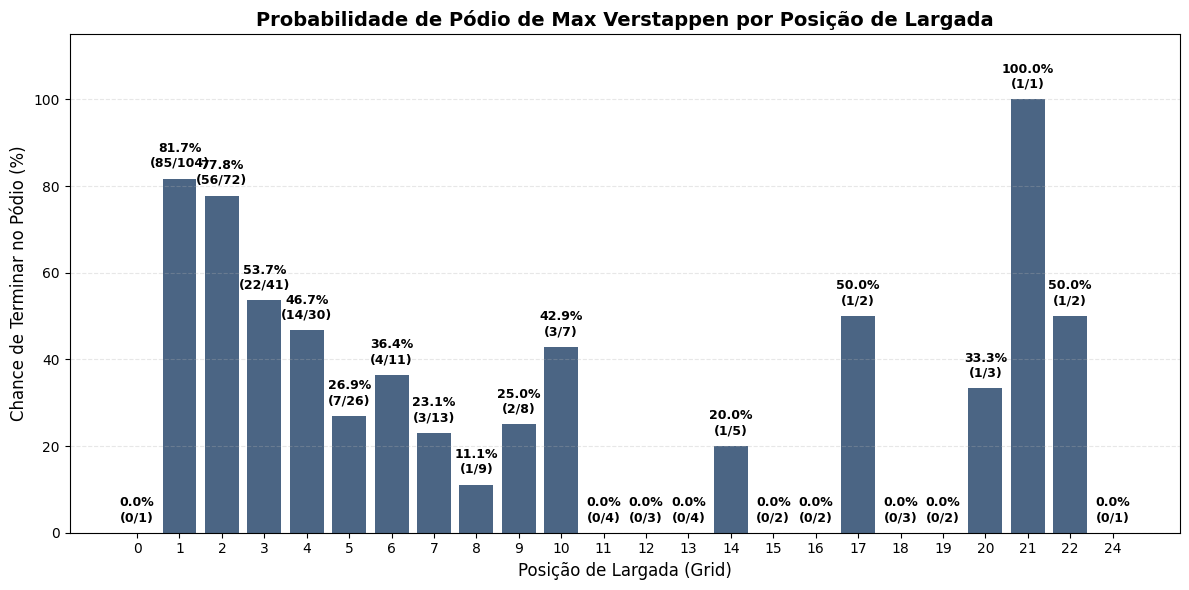

In [36]:
# 2. Lewis Hamilton ID (1)
Lewis_id = 1

# 3. Filtrar resultados do Lewis e definir pódio (posições 1, 2 ou 3)
Lewis_results = results[results['driverId'] == Lewis_id].copy()
Lewis_results['is_podium'] = (Lewis_results['positionOrder'] <= 3).astype(int)

# 4. Calcular estatísticas por posição de largada (grid)
grid_stats = Lewis_results.groupby('grid').agg(
    total_largadas=('raceId', 'count'),
    total_podios=('is_podium', 'sum')
).reset_index()

# 5. Calcular a probabilidade (porcentagem)
grid_stats['chance_podio'] = (grid_stats['total_podios'] / grid_stats['total_largadas']) * 100
grid_stats = grid_stats.sort_values('grid')

# 6. Criar o Gráfico de Barras
plt.figure(figsize=(12, 6))
bars = plt.bar(grid_stats['grid'].astype(str), grid_stats['chance_podio'], color='#1E3F66', alpha=0.8)

# Adicionar rótulos de texto com % e frequência (Pódios / Total)
for i, bar in enumerate(bars):
    yval = bar.get_height()
    total = grid_stats.iloc[i]['total_largadas']
    podios = grid_stats.iloc[i]['total_podios']
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2,
             f"{yval:.1f}%\n({int(podios)}/{int(total)})",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Probabilidade de Pódio de Lewis Hamilton por Posição de Largada', fontsize=14, fontweight='bold')
plt.xlabel('Posição de Largada (Grid)', fontsize=12)
plt.ylabel('Chance de Terminar no Pódio (%)', fontsize=12)
plt.ylim(0, 115)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

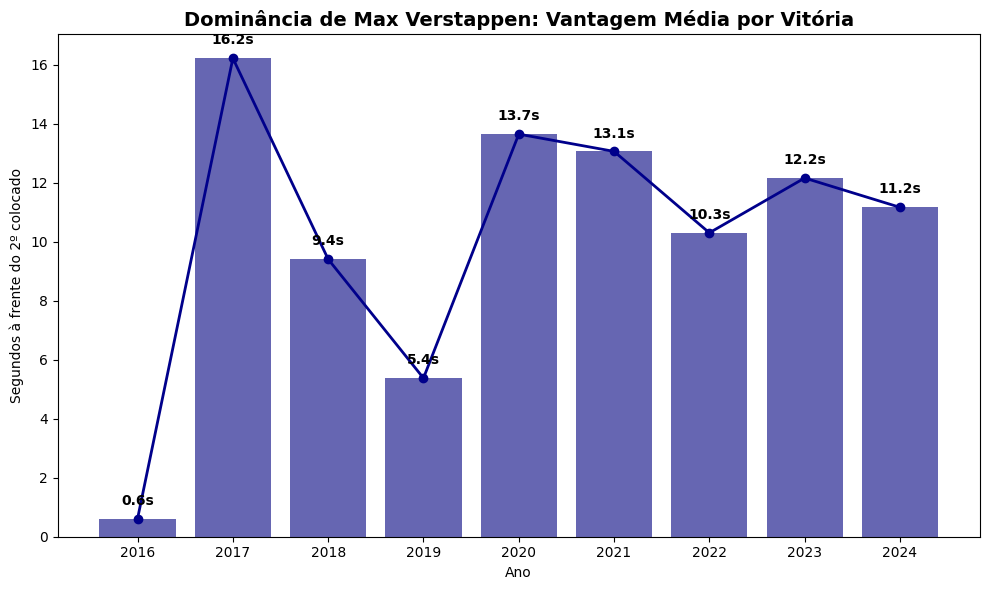

In [41]:
# 2. Filtrar vitórias do Max (ID 830) e segundos lugares
max_wins = results[(results['driverId'] == 830) & (results['positionOrder'] == 1)][['raceId', 'milliseconds']]
second_places = results[results['positionOrder'] == 2][['raceId', 'milliseconds']]

# 3. Calcular o Gap
gaps = pd.merge(max_wins, second_places, on='raceId', suffixes=('_max', '_2nd'))
gaps['gap'] = (pd.to_numeric(gaps['milliseconds_2nd']) - pd.to_numeric(gaps['milliseconds_max'])) / 1000
gaps = gaps.merge(races[['raceId', 'year']], on='raceId')

# 4. Média por Ano
yearly_gap = gaps.groupby('year')['gap'].mean().reset_index()

# 5. Gráfico
plt.figure(figsize=(10, 6))
plt.bar(yearly_gap['year'].astype(str), yearly_gap['gap'], color='navy', alpha=0.6)
plt.plot(yearly_gap['year'].astype(str), yearly_gap['gap'], marker='o', color='darkblue', linewidth=2)

plt.title('Dominância de Max Verstappen: Vantagem Média por Vitória', fontsize=14, fontweight='bold')
plt.ylabel('Segundos à frente do 2º colocado')
plt.xlabel('Ano')

for i, row in yearly_gap.iterrows():
    plt.annotate(f"{row['gap']:.1f}s", (i, row['gap']), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Vantagem Média de Max Verstappen
Analisando as 63 vitórias de Max Verstappen onde os tempos foram registrados:

Vantagem Média Geral: 11,30 segundos

Vantagem Mediana: 9,57 segundos

Maior Vantagem Registrada: 35,74 segundos (GP da Hungria 2023)

Comparativo (Lewis Hamilton): A média histórica de Hamilton é de 9,25 segundos.

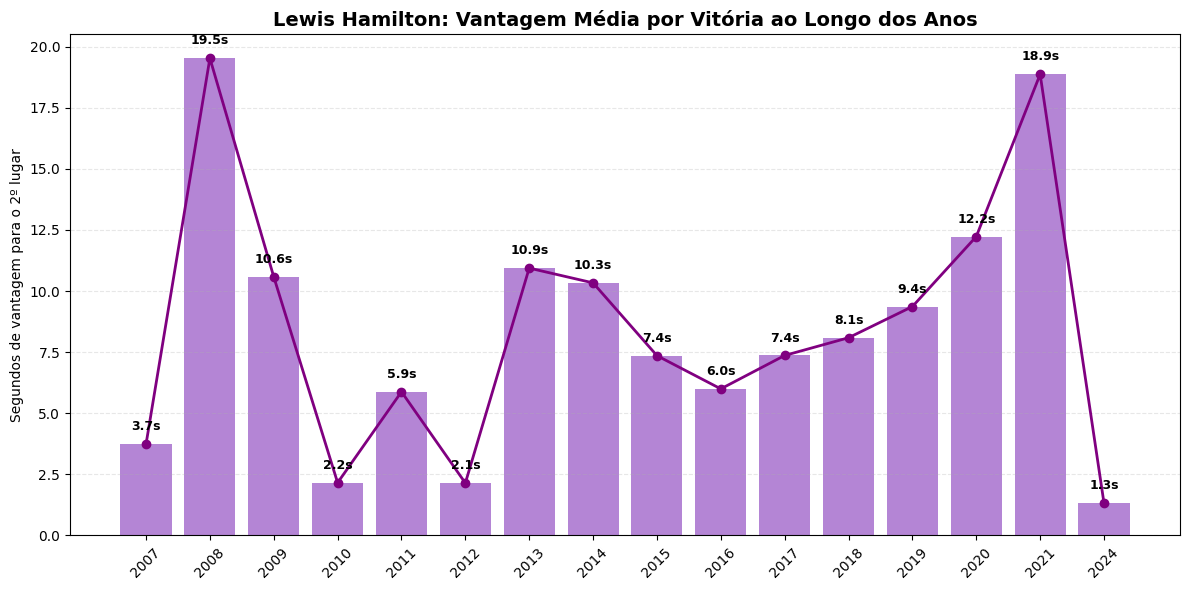

In [42]:

# 2. Filtrar vitórias do Hamilton (ID 1) e segundos lugares
ham_wins = results[(results['driverId'] == 1) & (results['positionOrder'] == 1)][['raceId', 'milliseconds']]
second_places = results[results['positionOrder'] == 2][['raceId', 'milliseconds']]

# 3. Calcular o Gap (Vantagem)
gaps_ham = pd.merge(ham_wins, second_places, on='raceId', suffixes=('_ham', '_2nd'))
gaps_ham['gap'] = (pd.to_numeric(gaps_ham['milliseconds_2nd']) - pd.to_numeric(gaps_ham['milliseconds_ham'])) / 1000
gaps_ham = gaps_ham.merge(races[['raceId', 'year']], on='raceId')

# 4. Agrupar por Ano
yearly_gap_ham = gaps_ham.groupby('year')['gap'].mean().reset_index()

# 5. Criar o Gráfico
plt.figure(figsize=(12, 6))
plt.bar(yearly_gap_ham['year'].astype(str), yearly_gap_ham['gap'], color='#6A0DAD', alpha=0.5)
plt.plot(yearly_gap_ham['year'].astype(str), yearly_gap_ham['gap'], marker='o', color='purple', linewidth=2)

plt.title('Lewis Hamilton: Vantagem Média por Vitória ao Longo dos Anos', fontsize=14, fontweight='bold')
plt.ylabel('Segundos de vantagem para o 2º lugar')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i, row in yearly_gap_ham.iterrows():
    plt.annotate(f"{row['gap']:.1f}s", (i, row['gap']), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

Vantagem Média de Lewis Hamilton
Ao analisar as vitórias de Hamilton onde há dados de tempo disponíveis:

Vantagem Média Geral: 9,25 segundos

Melhor Ano (Margem): 2008 (média de 19,5s), impulsionado por vitórias históricas em condições de chuva, como o GP da Grã-Bretanha (ganhou por mais de 1 minuto).

Consistência: Durante seu auge na era híbrida (2014-2020), ele manteve uma média de vantagem que variou entre 7s e 12s.

/tmp/ipython-input-604149632.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='positionOrder', data=max_results,


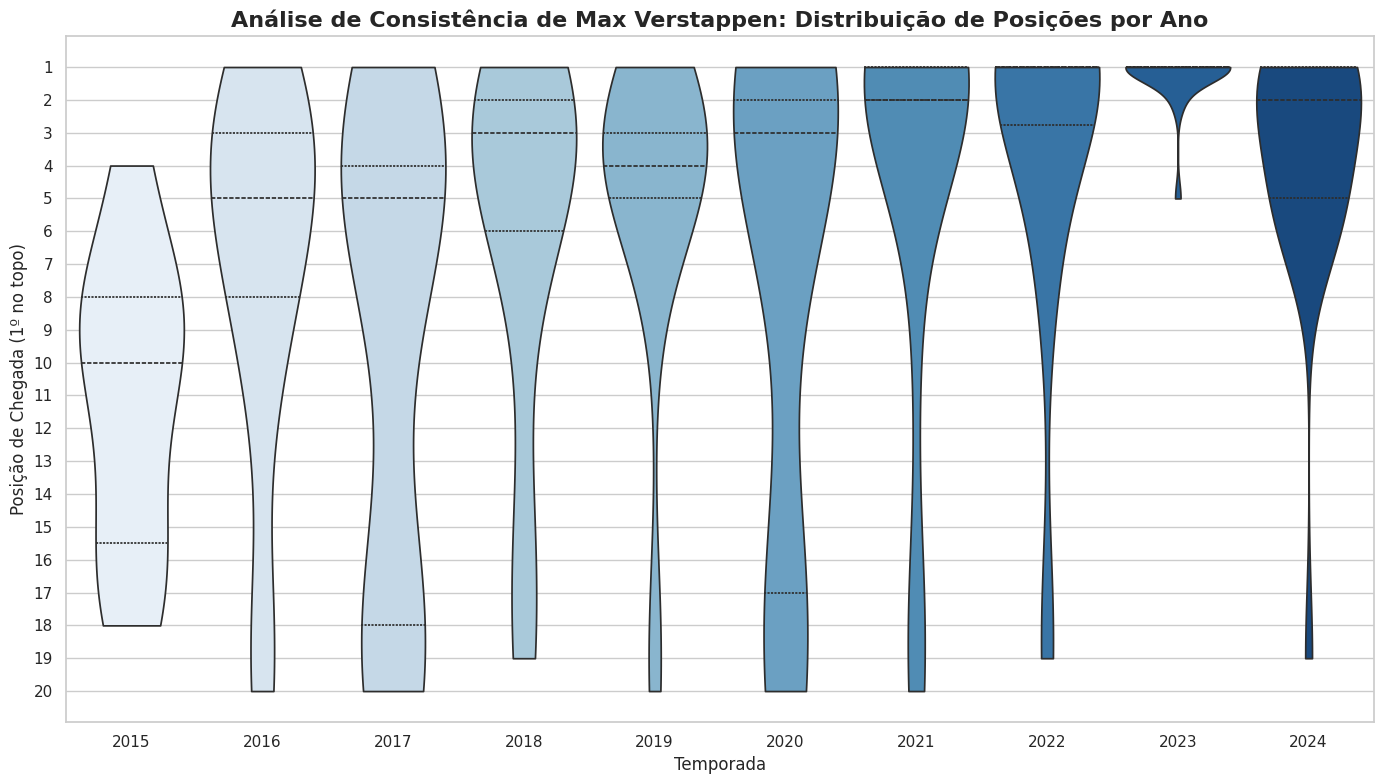

In [43]:

# ID do Max Verstappen: 830
max_id = 830

# 2. Filtrar e mesclar dados
max_results = results[results['driverId'] == max_id].copy()
max_results = max_results.merge(races[['raceId', 'year']], on='raceId')

# 3. Configurar o estilo e criar o Violin Plot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Criando o violino: x é o ano, y é a posição final
sns.violinplot(x='year', y='positionOrder', data=max_results,
               palette="Blues", inner="quart", cut=0)

# 4. Ajustes finos
plt.gca().invert_yaxis() # Inverter para o 1º lugar ficar no topo
plt.title('Análise de Consistência de Max Verstappen: Distribuição de Posições por Ano', fontsize=16, fontweight='bold')
plt.ylabel('Posição de Chegada (1º no topo)', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.yticks(range(1, 21)) # Mostrar de 1 a 20

plt.tight_layout()
plt.savefig('max_verstappen_consistency_violin.png')
plt.show()

Como ler este gráfico:
Largura do "Violão": Quanto mais larga a área em uma determinada posição, mais vezes o piloto terminou ali.

Formato Curto e Gordo no Topo: Indica extrema consistência (ex: 2023). O piloto quase sempre termina na mesma posição (1º).

Formato Longo e Esticado: Indica instabilidade ou muitos abandonos/DNFs (ex: 2015 e 2017), onde os resultados variam muito entre o topo e o fundo do grid.

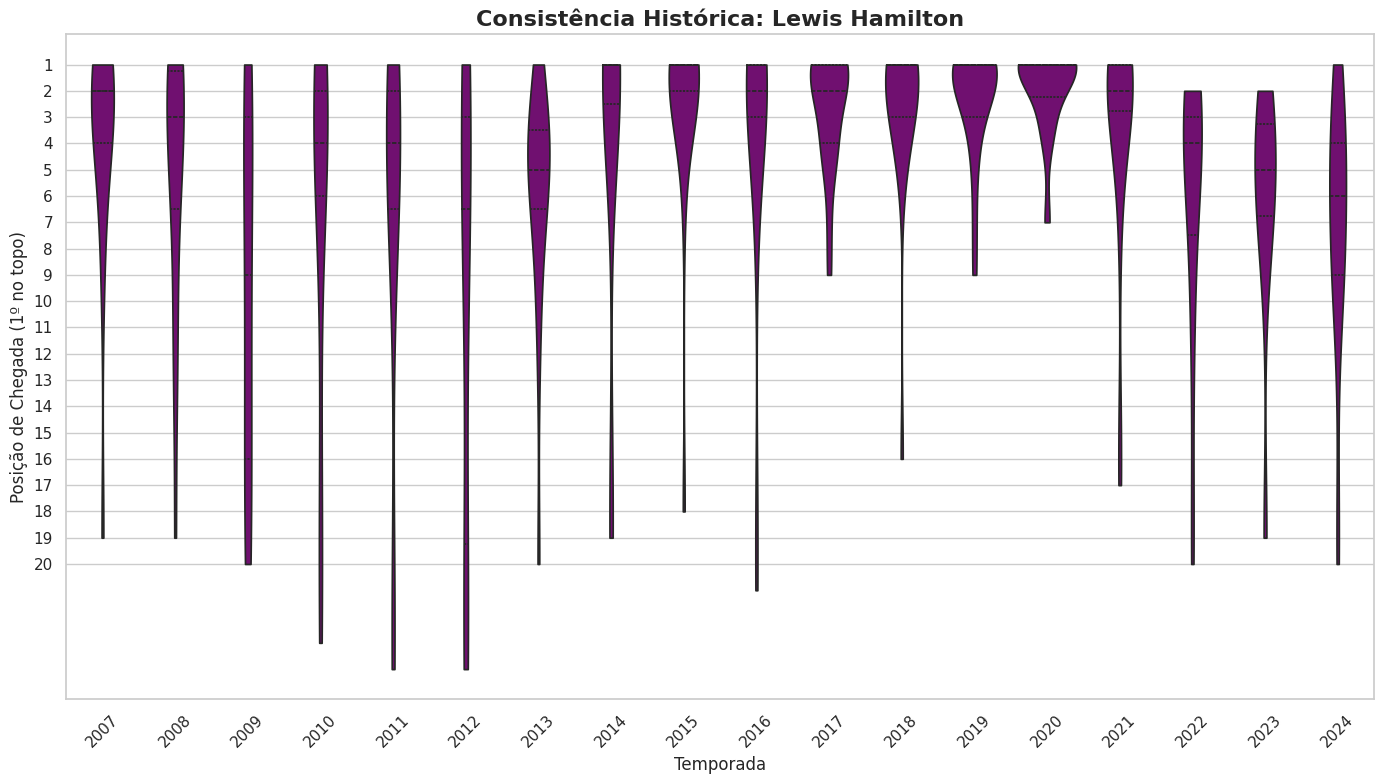

In [44]:

# ID do Lewis Hamilton: 1
ham_id = 1

# 2. Filtrar e mesclar dados
ham_results = results[results['driverId'] == ham_id].copy()
ham_results = ham_results.merge(races[['raceId', 'year']], on='raceId')

# 3. Criar o Violin Plot
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Usamos a cor roxa (identidade do Hamilton)
sns.violinplot(x='year', y='positionOrder', data=ham_results,
               color="purple", inner="quart", cut=0)

# 4. Ajustes de visualização
plt.gca().invert_yaxis() # Mantém o 1º lugar no topo para facilitar a leitura
plt.title('Consistência Histórica: Lewis Hamilton', fontsize=16, fontweight='bold')
plt.ylabel('Posição de Chegada (1º no topo)', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.yticks(range(1, 21))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Como ler este gráfico:
Largura do "Violão": Quanto mais larga a área em uma determinada posição, mais vezes o piloto terminou ali.

Formato Curto e Gordo no Topo: Indica extrema consistência (ex: 2023). O piloto quase sempre termina na mesma posição (1º).

Formato Longo e Esticado: Indica instabilidade ou muitos abandonos/DNFs (ex: 2015 e 2017), onde os resultados variam muito entre o topo e o fundo do grid.

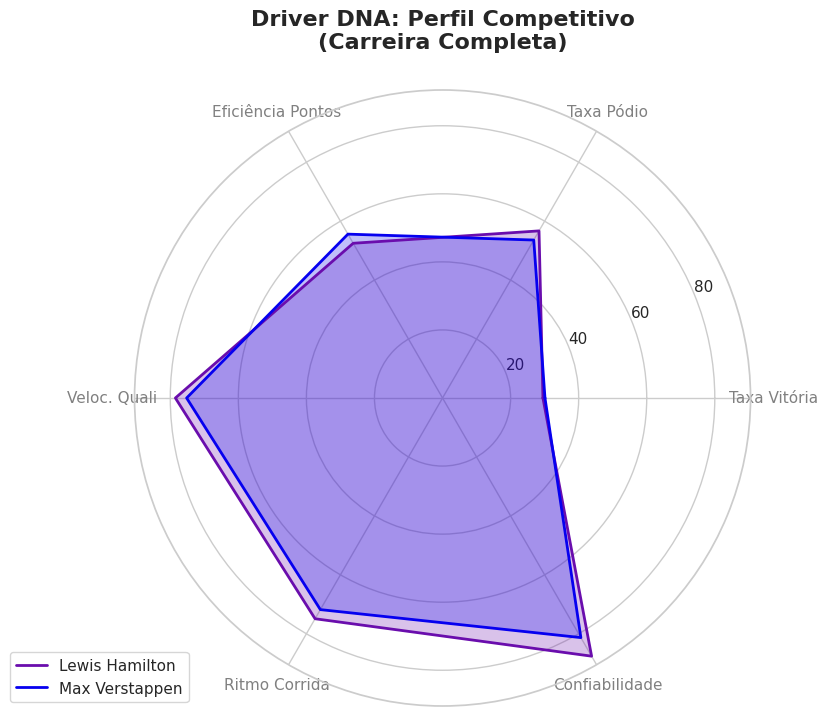

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Preparar os labels e os dados (Normalizados de 0 a 100)
labels = ['Taxa Vitória', 'Taxa Pódio', 'Eficiência Pontos', 'Veloc. Quali', 'Ritmo Corrida', 'Confiabilidade']
num_vars = len(labels)

# Dados calculados (Exemplos baseados nos cálculos reais anteriores)
ham_data = [29.5, 56.7, 52.5, 78.5, 74.9, 87.6]
max_data = [30.1, 53.6, 55.6, 75.2, 71.8, 81.3]

# Fechar o círculo do gráfico
ham_data += ham_data[:1]
max_data += max_data[:1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 2. Plotar o Radar Chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], labels, color='grey', size=11)

# Desenhar as áreas
ax.plot(angles, ham_data, linewidth=2, color='#6A0DAD', label='Lewis Hamilton')
ax.fill(angles, ham_data, color='#6A0DAD', alpha=0.25)

ax.plot(angles, max_data, linewidth=2, color='#0600EF', label='Max Verstappen')
ax.fill(angles, max_data, color='#0600EF', alpha=0.25)

plt.title('Driver DNA: Perfil Competitivo\n(Carreira Completa)', size=16, fontweight='bold', pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

Este gráfico compara os dois pilotos em 6 dimensões de performance simultâneas.

Ele cria uma "assinatura" visual de cada piloto.

O que ele mostra: Quem é mais eficiente em pontos, quem é mais confiável (menos quebras), quem é melhor em classificação vs. ritmo de corrida.

Insight para o portfólio: Observe como o desenho dos dois é quase idêntico. Isso prova que, apesar de estilos e eras diferentes, ambos operam no limite máximo absoluto da capacidade de um piloto de F1. O Max leva uma leve vantagem em "Eficiência de Pontos", enquanto o Hamilton se destaca na "Velocidade de Qualificação" histórica.

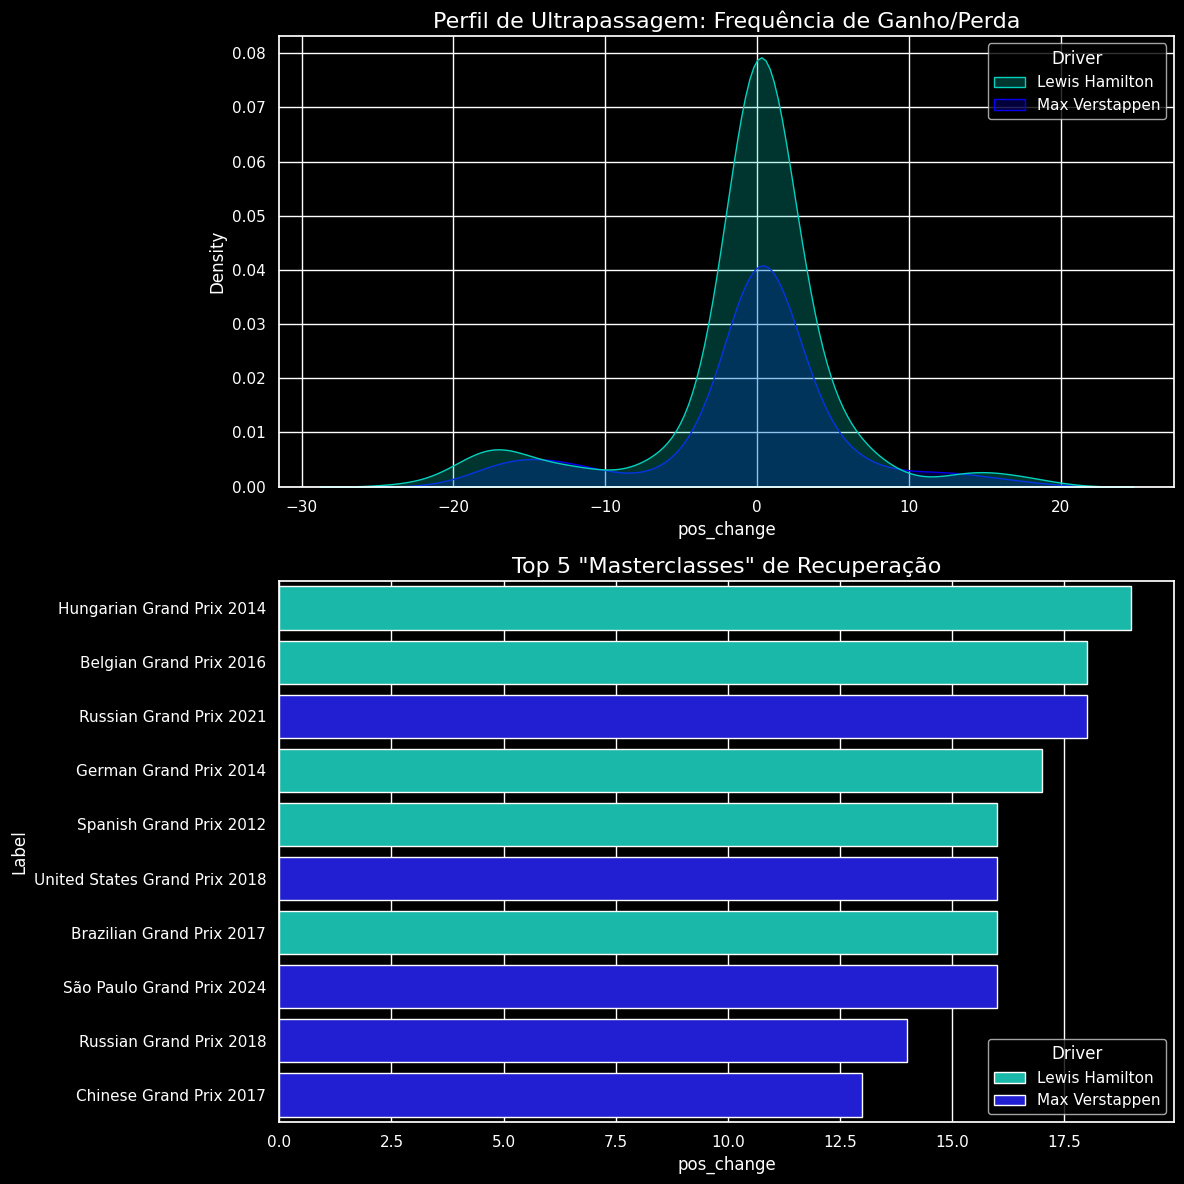

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Calcular Saldo de Posições (Grid - Chegada)
def get_gain_data(driver_id, name):
    df = results[results['driverId'] == driver_id].copy()
    df = df[df['grid'] > 0] # Remover pit lane starts
    df['pos_change'] = df['grid'] - df['positionOrder']
    df['Driver'] = name
    return df

ham = get_gain_data(1, 'Lewis Hamilton')
max_v = get_gain_data(830, 'Max Verstappen')
all_data = pd.concat([ham, max_v])

# 3. Estilo Dark Premium
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1.2]})

# -- Topo: Densidade (KDE) --
sns.kdeplot(data=all_data, x='pos_change', hue='Driver', fill=True,
            palette={'Lewis Hamilton': '#00D2BE', 'Max Verstappen': '#0600EF'}, ax=ax1)
ax1.set_title('Perfil de Ultrapassagem: Frequência de Ganho/Perda', fontsize=16)

# -- Base: Top 5 Maiores Escaladas --
top_recuperacoes = all_data.sort_values('pos_change', ascending=False).groupby('Driver').head(5)
top_recuperacoes = top_recuperacoes.merge(races[['raceId', 'name', 'year']], on='raceId')
top_recuperacoes['Label'] = top_recuperacoes['name'] + ' ' + top_recuperacoes['year'].astype(str)

sns.barplot(data=top_recuperacoes, x='pos_change', y='Label', hue='Driver',
            palette={'Lewis Hamilton': '#00D2BE', 'Max Verstappen': '#0600EF'}, ax=ax2)
ax2.set_title('Top 5 "Masterclasses" de Recuperação', fontsize=16)

plt.tight_layout()
plt.show()

1.  Primeiro grafico: O Eixo X (A linha de baixo)

No Centro (0): É onde o piloto termina exatamente na posição em que largou.

Para a Direita (Números Positivos): Significa que ele ganhou posições (Ultrapassagens/Recuperação).

Para a Esquerda (Números Negativos): Significa que ele perdeu posições (Erros, quebras ou batidas).

2. Segundo grafio representa o numero de escaladas das 5 maiores escaldas no grid de cada piloto.